# Udacity Project: Write A Data Science Blog Post
This project is going to explore Boston AirBnB data from the perspective of someone looking to invest in a new property.

## Section 1: Business Understanding
As a hypothetical Bostonian, I'm looking to invest in a property to turn into a short term rental. Boston is a big city, so I'd like to look at the existing Boston listings to better understand what I should be looking for in a property and how I can prepare to adjust my prices for seasonality.

#### Question 1: Where should I tell my realtor to start looking for properties - which Boston neighborhoods yield higher list prices? Are there certain types of properties that influence list prices?
#### Question 2: What kind of internal features should I consider in a property? Does how many bedrooms and bathrooms influence list price?
#### Question 3: How can I expect to adjust my prices throughout the year? What is the seasonality by month for list prices?

### Initial Package Imports and Data (Boston Airbnb)

In [236]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Section 2: Data Understanding
### Pulling in both Calendar and Listings datasets

In [246]:
# Reading in Calendar dataset
cal_dat = pd.read_csv('calendar.csv')

# viewing first few rows
cal_dat.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [248]:
# Reading in Listings dataset
list_dat = pd.read_csv('listings.csv')

# viewing first few rows
list_dat.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


### Getting to know the datasets

In [250]:
cal_dat.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [252]:
cal_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [254]:
list_dat.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [256]:
list_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

# Section 3: Data Preparation
### Cleaning the data
#### Fixing column names
When doing my quick overview of the data above, I noticed that the listing_id will be my key to join my data together. However, in my Listings dataset, it is only referred to as id. To avoid confusion while working with the data and to be able to easily merge the data later, I'm going to rename that column now to match the Calendar dataset.

In [258]:
# renaming id to be listing id for merging data later
list_dat = list_dat.rename(columns={'id': 'listing_id'})

#### Changing currency fields to floats for analysis
Rental prices are listed as currency and therefor an object for python. I'd like to be able to analyze them as floats when doing my analysis. Since there are multiple columns across both datasets that are listed as currency, I'm going to create a function to more efficiently change them to usable floats.

In [260]:
# creating single function to change currency to floats
def clean_prices(x):
    """
        Function for converting currency strings into floats
    """
    if isinstance(x, str):
        return (x.replace('$', '').replace(',', ''))
    return

In [262]:
# Changing any currency fields to floats across both
# Listings and Calendar datasets
list_dat['price'] = list_dat['price'].apply(
    clean_prices).astype('float')
list_dat['weekly_price'] = list_dat['weekly_price'].apply(
    clean_prices).astype('float')
list_dat['monthly_price'] = list_dat['monthly_price'].apply(
    clean_prices).astype('float')
list_dat['security_deposit'] = list_dat['security_deposit'].apply(
    clean_prices).astype('float')
list_dat['cleaning_fee'] = list_dat['cleaning_fee'].apply(
    clean_prices).astype('float')
cal_dat['price'] = cal_dat['price'].apply(clean_prices).astype('float')

#### Adding date fields for grouping calendar data
Since I want to explore the seasonality of list prices, so I can prepare to adjust my prices accordingly and build out my business plan, I'll need to look at the dates available in the Calendar dataset in a more usable way. I know I want to look at prices by month. I may also want to explore if I should change my prices based on day of the week. Later on down the road, I'll want to explore the influence of certain holidays and major events, but for now, let's look at the high level month and day of week influences on list price.

In [264]:
# I'd also like to look at this data by day of week and month,
# so I'd like to extrapolate the existing date fields
cal_dat['date'] = pd.to_datetime(cal_dat['date'])
cal_dat['day_of_week'] = cal_dat['date'].dt.day_name()
cal_dat['month'] = cal_dat['date'].dt.month_name()

#### Narrowing down my data and removing null values
There are a lot of extra fields I'm not as interested in, so I want to narrow my dataset to just the fields I need. I also want to remove any records that don't include a list price. For bedrooms, bathrooms, beds, and the review rating, I'm going to apply the column mean based on similar properties (neighborhood, property type, room type, and accomodates).

In [266]:
# For my analysis, I would like to look at prices in relation to
# fields such as neighborhood and number of bedrooms to see
# what kind of properties I should consider investing in
# To do this, I'd like to remove any null values for my subset of data

list2_dat = list_dat[['listing_id', 'price', 'neighbourhood_cleansed',
                      'property_type', 'room_type', 'accommodates',
                      'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']]
# dropping any records that don't have a price listed
# since that is the primary field of interest to me
list2_dat = list2_dat.dropna(
    subset=['price'])

# imputing property type first so that it can be used to group other missing values
list2_dat['property_type'] = list2_dat.groupby(
    ['neighbourhood_cleansed', 'room_type',
     'accommodates'])['property_type'].transform(lambda x: x.fillna(x.mode()[0]))

# imputing values for remaining columns with null values
list2_dat['bathrooms'] = list2_dat['bathrooms'].fillna(list2_dat.groupby(
    ['neighbourhood_cleansed','property_type', 'room_type', 'accommodates'])['bathrooms'].transform('mean'))

list2_dat['bedrooms'] = list2_dat['bedrooms'].fillna(list2_dat.groupby(
    ['neighbourhood_cleansed','property_type', 'room_type', 'accommodates'])['bedrooms'].transform('mean'))

list2_dat['beds'] = list2_dat['beds'].fillna(list2_dat.groupby(
    ['neighbourhood_cleansed','property_type', 'room_type', 'accommodates'])['beds'].transform('mean'))

list2_dat['review_scores_rating'] = list2_dat['review_scores_rating'].fillna(list2_dat.groupby(
    ['neighbourhood_cleansed','property_type', 'room_type', 'accommodates'])['review_scores_rating'].transform('mean'))


list2_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              3585 non-null   int64  
 1   price                   3585 non-null   float64
 2   neighbourhood_cleansed  3585 non-null   object 
 3   property_type           3585 non-null   object 
 4   room_type               3585 non-null   object 
 5   accommodates            3585 non-null   int64  
 6   bathrooms               3584 non-null   float64
 7   bedrooms                3585 non-null   float64
 8   beds                    3584 non-null   float64
 9   review_scores_rating    3497 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 280.2+ KB


Since there are still some nulls for beds and review ratings due to my group by, I'm just going to remove the extra nulls to avoid any impact on the analysis.

In [268]:
# removing excess nulls
list2_dat = list2_dat.dropna()
list2_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3496 entries, 0 to 3584
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              3496 non-null   int64  
 1   price                   3496 non-null   float64
 2   neighbourhood_cleansed  3496 non-null   object 
 3   property_type           3496 non-null   object 
 4   room_type               3496 non-null   object 
 5   accommodates            3496 non-null   int64  
 6   bathrooms               3496 non-null   float64
 7   bedrooms                3496 non-null   float64
 8   beds                    3496 non-null   float64
 9   review_scores_rating    3496 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 300.4+ KB


Since I'll also want to run a correlation matrix to see what kind of features I should be looking for in a property, I'll go ahead and clean the subset of data for that now.

In [270]:
# subset of data for correlation matrix
list2_corr = list2_dat[['price', 'accommodates',
                        'bathrooms', 'bedrooms', 'beds',
                        'review_scores_rating']]
list2_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3496 entries, 0 to 3584
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 3496 non-null   float64
 1   accommodates          3496 non-null   int64  
 2   bathrooms             3496 non-null   float64
 3   bedrooms              3496 non-null   float64
 4   beds                  3496 non-null   float64
 5   review_scores_rating  3496 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 191.2 KB


#### Combining Calendar and Listings data for seasonality pricing
I want to combine my Calendar and Listings datasets through merging on listing_id. This will allow me to look at the seasonality of pricing, but also pulling in the qualitative fields like neighborhood that I'm missing in the Calendar dataset. I will want to do my analysis of seasonal pricing based off the neighborhoods where I want to focus my search, so I will merge this data after I analyze neighborhoods and property features.

# Section 4: Evaluation
### Question 1: Where should I tell my realtor to start looking for properties - which Boston neighborhoods yield higher list prices? Are there certain types of properties that influence list prices?
I first want to know where in the city I should be looking at properties. Let's check out the average list price based on neighborhood. I'll visualize this through a bar chart and an accompanying table. I'll make sure to include number of listings in each neighborhood in the table to give context to the average price.

Text(0, 0.5, 'Mean List Price ($)')

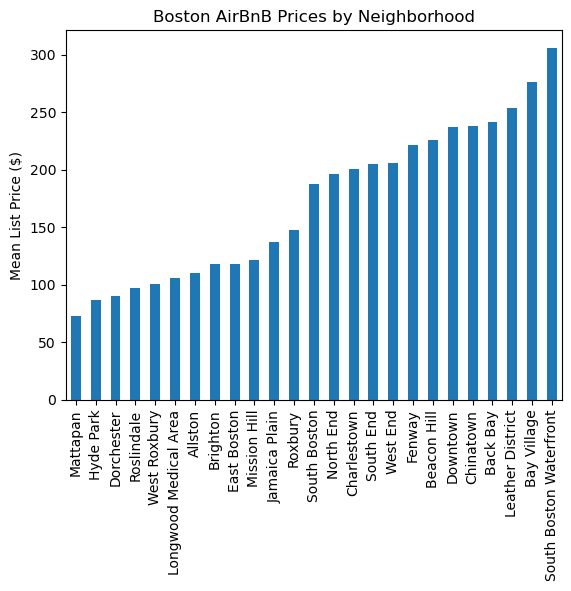

In [272]:
# I first want to know where in the city I should be
# looking at properties based on avg neighborhood list prices
# Calculate the average price based on neighborhood,
# sort to easily identify top neighborhoods
nbrhd = list2_dat.groupby(
    list2_dat['neighbourhood_cleansed'])['price'].mean().sort_values()
# plot for visual representation
nbrhd.plot(kind='bar')
plt.title('Boston AirBnB Prices by Neighborhood')
plt.xlabel('')
plt.ylabel('Mean List Price ($)')

Looks like we will definitely be able to narrow down our search based on neighborhoods. Let's look at the data in a table to add some additional context before selecting exactly which neighborhoods.

I'm going to have to transform the neighborhood prices series back into a dataframe and then compute the number of records for each of those neighborhoods and combine them in a single dataframe. I'll also want to display prices back in currency form, so I'm going to style average list price appropriately.

In [274]:
# convert series to dataframe for easy table
# identifying average prices and count so there's some context to the numbers
nbrhd_prices = nbrhd.to_frame()
# pull the count of listings in each neighborhood,
# so I'm not looking at a small sample
nbrhd_cnt = list2_dat['neighbourhood_cleansed'].value_counts()
# merge two dataframes to view in one table
nbrhd_df = pd.merge(nbrhd_prices,
                    nbrhd_cnt, how='left', on='neighbourhood_cleansed')
# format list prices for visual currency, rename columns
nbrhd_df = nbrhd_df.rename(
    columns={'price':'Avg List Price','count':'# of Listings'})
nbrhd_df.index.name = 'Neighborhood'
nbrhd_df = nbrhd_df.style.format({'Avg List Price': "${:,.2f}"})

nbrhd_df

,Avg List Price,# of Listings
Neighborhood,,
Mattapan,$72.64,22
Hyde Park,$86.55,31
Dorchester,$90.62,265
Roslindale,$97.49,55
West Roxbury,$100.80,41
Longwood Medical Area,$105.67,3
Allston,$110.01,254
Brighton,$117.79,179
East Boston,$118.04,147


Looks like we can narrow our search down to the top 5 neighborhoods. Leather District only has 5 listings in it, and Bay Village/South Boston Waterfront both have quite a few less than Downtown and Back Bay. I'll probably want to do some outside research to see why that may be, especially in the case of Leather District, but for now, I'll narrow my search down to those 5.

### Question 2: What kind of internal features should I consider in a property? Does how many bedrooms and bathrooms influence list price?
Now that I know what neighborhoods I should be looking into, I want to know what kind of properties I should be considering. I already created a subset of data to look into this, but let's create a correlation matrix and visualize it in a heatmap. I'm also thinking ahead to my future reviews and wondering if any of the property features might influence my future ratings. It's ok if they don't, but if they do, I want to know up front.

To start I'm going to run this for all of Boston, and then I'll run it again looking at just my neighborhoods.

Text(0.5, 1.0, 'Price Correlations for Boston AirBnBs')

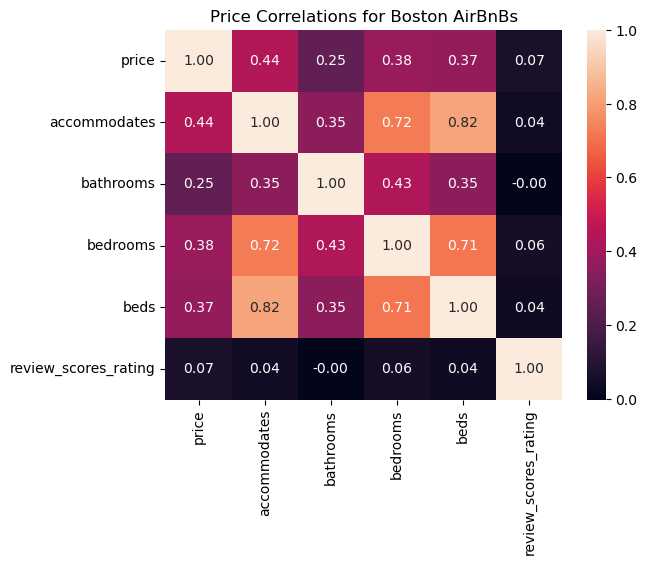

In [276]:
# I'd like to know what house features I should
# consider when purchasing a property
# lets look at a heat map of a correlation matrix
# looking at some of the numeric property features

sns.heatmap(list2_corr.corr(), annot=True, fmt=".2f")

plt.title('Price Correlations for Boston AirBnBs')

It looks like I don't need to worry about property features impacting my future reviews, which is good for now. I'll be able to shelve looking into review data until after I purchase my property and start diving into after purchase features.

That said, it does look like I should be considering the number of bedrooms and thinking about how many people a space can accomodate when touring homes. It's not a super strong correlation, but it is enough that I can act on it. Based on this, it doesn't look like I need to worry about having too many extra bathrooms on my property, so I'll let my realtor know to prioritize extra bedrooms and flex spaces over extra bathrooms.

Let's look at if this holds within our target neighborhoods.

Text(0.5, 1.0, 'Price Correlations for Boston AirBnBs')

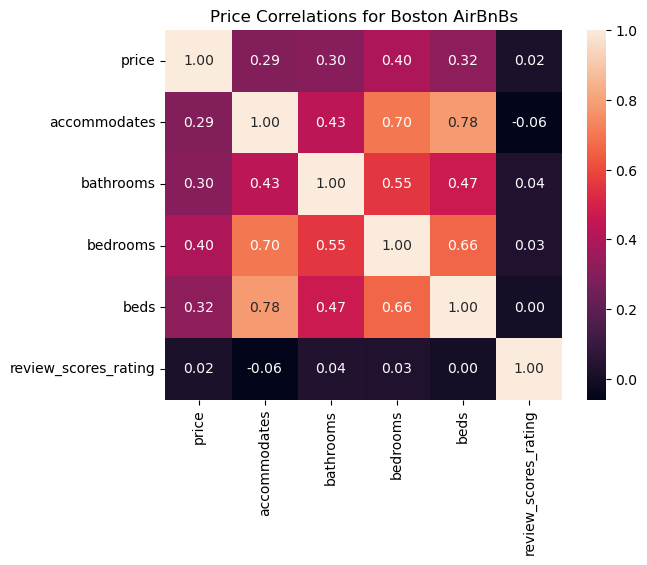

In [278]:
# Subsetting existing dataset to include the top 5 neighborhoods
nbhd_dat = list2_dat[list2_dat['neighbourhood_cleansed'].isin(
    ['Downtown', 'Back Bay', 'Leather District',
     'Bay Village', 'South Boston Waterfront'])]
nbhd_corr = nbhd_dat[['price', 'accommodates',
                        'bathrooms', 'bedrooms', 'beds',
                        'review_scores_rating']]

# creating heatmap based on correlation matrix
sns.heatmap(nbhd_corr.corr(), annot=True, fmt=".2f")

plt.title('Price Correlations for Boston AirBnBs')


It looks like bedrooms are more important than the number of folks I can accomodate in my target neighborhoods. It might have to do with how guests book their listings. I'll have to consider that later.

Just out of curiosity, I'm interested in what number of bedrooms I should be focusing on to maximize my return on investment. I'm don't need anything fancy here, just want to see generally how the number of bedrooms shakes out in relation to list price, so I'll look at a scatter plot.

<Axes: xlabel='bedrooms', ylabel='price'>

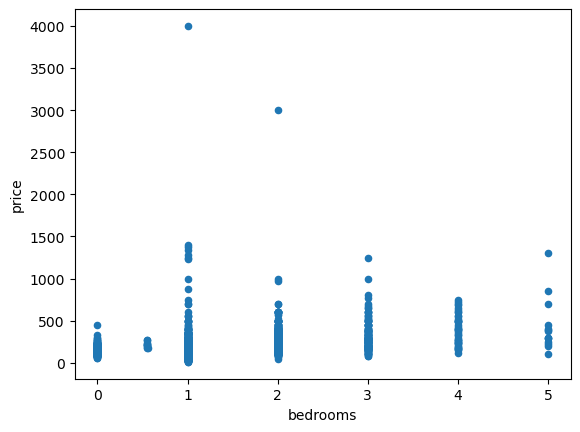

In [280]:
# bedroom vs list price scatter plot for analysis
list2_corr.plot.scatter(x='bedrooms', y='price')

This looks like I should consider focusing on spaces with 1 or 3 bedrooms. My guess is that is depends on the type of visit my target guests desire. While more bedrooms could be nice to accomodate larger groups, I should consider if smaller groups are more common and then supply and demand of spaces impacts price. I'll definitely want to evaluate both kinds of property spaces and see what is available and then do further analysis when I'm ready to make a purchase decision.

Let's look at it for my target neighborhood.

<Axes: xlabel='bedrooms', ylabel='price'>

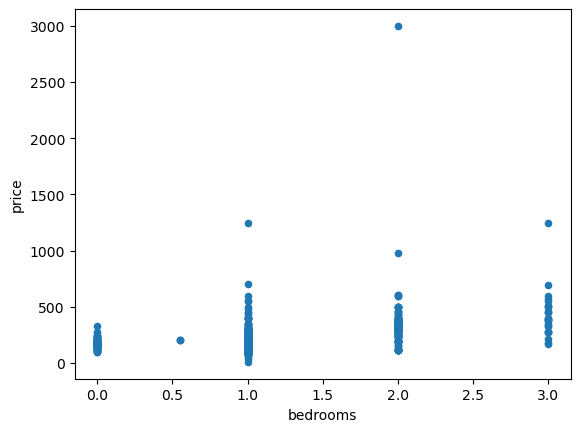

In [284]:
# bedroom vs list price scatter plot for analysis
nbhd_corr.plot.scatter(x='bedrooms', y='price')

It does look like I should consider smaller properties and really focus in on what kind of guests I want to host and work to fit my property to those needs.

What kind of property should I be considering though? Let's look at average list price by property type in a bar chart

Text(0, 0.5, 'Mean List Price ($)')

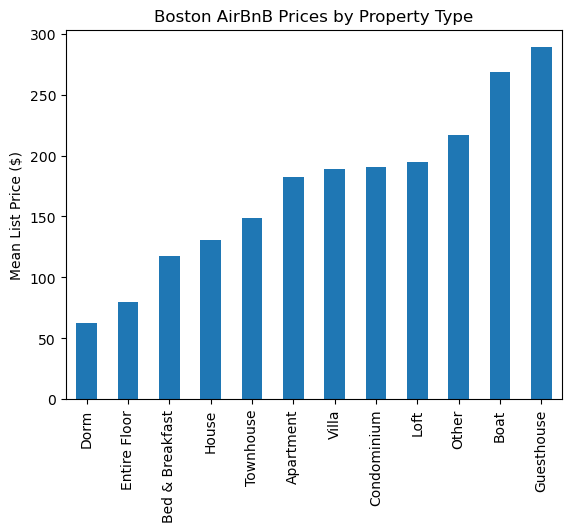

In [286]:
# calculate mean of list price by grouping by property type
propty = list2_dat.groupby(
    list2_dat['property_type'])['price'].mean().sort_values()

# visualize in a bar chart
propty.plot(kind='bar')
plt.title('Boston AirBnB Prices by Property Type')
plt.xlabel('')
plt.ylabel('Mean List Price ($)')

I'm interested in a stand alone property, separate from my home, but it looks like apartments/condos etc might perform better than houses/townhouses. Let's check out the data in table form with some counts of properties as added context before making a conclusion.

In [294]:
# convert series to dataframe for easy table identifying
# average prices and count so there's some context to the numbers
propty_prices = propty.to_frame()
# pull the count of listings for each property type,
# so I'm not looking at a small sample
propty_cnt = list2_dat['property_type'].value_counts()
# merge two dataframes to view in one table
propty_df = pd.merge(propty_prices, propty_cnt, how='left', on='property_type')
# format list prices for visual currency, rename columns
propty_df = propty_df.rename(
    columns={'price': 'Avg List Price', 'count': '# of Listings'})
propty_df.index.name = 'Property Type'
propty_df = propty_df.style.format({'Avg List Price': "${:,.2f}"})

propty_df

,Avg List Price,# of Listings
Property Type,,
Dorm,$62.50,2
Entire Floor,$80.00,1
Bed & Breakfast,$117.72,32
House,$130.89,556
Townhouse,$148.86,50
Apartment,$182.16,2579
Villa,$189.00,3
Condominium,$190.61,213
Loft,$195.00,34


Apartments definitely dominate the available listings space over other property types and garner about $50 more in average list prices than stand alone houses. This is good to know for my investment. While this may be true for Boston overall, let's check in my target neighborhoods.

Text(0, 0.5, 'Mean List Price ($)')

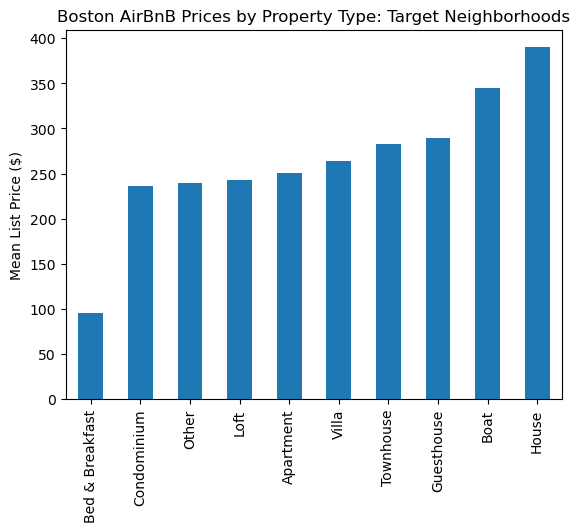

In [292]:
# What if I just wanted to look at
propty2 = nbhd_dat.groupby(
    nbhd_dat['property_type'])['price'].mean().sort_values()
propty2.plot(kind='bar')
plt.title('Boston AirBnB Prices by Property Type: Target Neighborhoods')
plt.xlabel('')
plt.ylabel('Mean List Price ($)')

My target neighborhoods are telling a different story with houses taking the top spot. Let's check out the granular data in a table to see some extra context.

In [296]:
# convert series to dataframe for easy table identifying
# average prices and count so there's some context to the numbers
propty2_prices = propty2.to_frame()
# pull the count of listings for each property type,
# so I'm not looking at a small sample
propty2_cnt = nbhd_dat['property_type'].value_counts()
# merge two dataframes to view in one table
propty2_df = pd.merge(propty2_prices,
                      propty2_cnt, how='left', on='property_type')
# format list prices for visual currency, rename columns
propty2_df = propty2_df.rename(
    columns={'price':'Avg List Price', 'count':'# of Listings'})
propty2_df.index.name = 'Property Type'
propty2_df = propty2_df.style.format(
    {'Avg List Price':"${:,.2f}"})

propty2_df

,Avg List Price,# of Listings
Property Type,,
Bed & Breakfast,$95.75,4
Condominium,$235.65,31
Other,$240.00,4
Loft,$243.36,14
Apartment,$250.64,503
Villa,$263.50,2
Townhouse,$283.00,3
Guesthouse,$289.00,1
Boat,$345.00,1


I'll potentially want to keep the door open to houses when looking at properties in my neighborhoods, since they garner $140 higher list price on average than apartments. However, there's only 9 houses in my sample, so I'll still be focusing my search on apartments.

I've narrowed down my neighborhood search and told my realtor to focus on apartments, but that I don't want to close the door on looking at houses. We're looking at 1 or 3 bedrooms, and going to think about the type of guests I'll be able to accomodate with the available spaces on the market.

### Question 3: How can I expect to adjust my prices throughout the year? What is the seasonality by month for list prices?
Thinking ahead, I'd like to think of how my prices will fluctuate throughout the year. I've already cordoned off a part of the dataset for my target neighborhoods. Let's merge in the calendar dataset on listing_id to get monthly price insights.

In [298]:
# Reminding myself what was in the neighborhood subset I created earlier
nbhd_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 526 to 3118
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              572 non-null    int64  
 1   price                   572 non-null    float64
 2   neighbourhood_cleansed  572 non-null    object 
 3   property_type           572 non-null    object 
 4   room_type               572 non-null    object 
 5   accommodates            572 non-null    int64  
 6   bathrooms               572 non-null    float64
 7   bedrooms                572 non-null    float64
 8   beds                    572 non-null    float64
 9   review_scores_rating    572 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 49.2+ KB


In [300]:
# merging my neighborhood listings with calendar listing data
# luckily I cleaned some of this data early on,
# so I don't need to change much
bh_cal = pd.merge(nbhd_dat, cal_dat, how='left', on='listing_id')
bh_cal.head()
bh_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209145 entries, 0 to 209144
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   listing_id              209145 non-null  int64         
 1   price_x                 209145 non-null  float64       
 2   neighbourhood_cleansed  209145 non-null  object        
 3   property_type           209145 non-null  object        
 4   room_type               209145 non-null  object        
 5   accommodates            209145 non-null  int64         
 6   bathrooms               209145 non-null  float64       
 7   bedrooms                209145 non-null  float64       
 8   beds                    209145 non-null  float64       
 9   review_scores_rating    209145 non-null  float64       
 10  date                    209145 non-null  datetime64[ns]
 11  available               209145 non-null  object        
 12  price_y                 105719

It looks like there are a lot of prices missing, so let's impute a mean grouping on property features, as well as month and day of week.

In [302]:
# Initial null prices being imputed with means
# grouped based on most property features available
bh_cal['price_y'] = bh_cal['price_y'].fillna(bh_cal.groupby(
    ['neighbourhood_cleansed','property_type', 'room_type', 'accommodates',
    'bathrooms', 'bedrooms', 'month', 'day_of_week'])['price_y'].transform('mean'))
bh_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209145 entries, 0 to 209144
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   listing_id              209145 non-null  int64         
 1   price_x                 209145 non-null  float64       
 2   neighbourhood_cleansed  209145 non-null  object        
 3   property_type           209145 non-null  object        
 4   room_type               209145 non-null  object        
 5   accommodates            209145 non-null  int64         
 6   bathrooms               209145 non-null  float64       
 7   bedrooms                209145 non-null  float64       
 8   beds                    209145 non-null  float64       
 9   review_scores_rating    209145 non-null  float64       
 10  date                    209145 non-null  datetime64[ns]
 11  available               209145 non-null  object        
 12  price_y                 183006

There's still some null prices, so let's try grouping the remaining nulls based on a smaller subset of property features.

In [304]:
# imputing based on a smaller subset of property features
bh_cal['price_y'] = bh_cal['price_y'].fillna(bh_cal.groupby(
    ['neighbourhood_cleansed','property_type',
    'bedrooms', 'month'])['price_y'].transform('mean'))
bh_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209145 entries, 0 to 209144
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   listing_id              209145 non-null  int64         
 1   price_x                 209145 non-null  float64       
 2   neighbourhood_cleansed  209145 non-null  object        
 3   property_type           209145 non-null  object        
 4   room_type               209145 non-null  object        
 5   accommodates            209145 non-null  int64         
 6   bathrooms               209145 non-null  float64       
 7   bedrooms                209145 non-null  float64       
 8   beds                    209145 non-null  float64       
 9   review_scores_rating    209145 non-null  float64       
 10  date                    209145 non-null  datetime64[ns]
 11  available               209145 non-null  object        
 12  price_y                 203730

There's still some null prices, but I don't want to fasely assign an inappropriate average price, so I'm going to remove the remaining rows with null prices.

In [306]:
# removing remaining null prices 
bh_cal = bh_cal.dropna()
bh_cal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203730 entries, 0 to 209144
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   listing_id              203730 non-null  int64         
 1   price_x                 203730 non-null  float64       
 2   neighbourhood_cleansed  203730 non-null  object        
 3   property_type           203730 non-null  object        
 4   room_type               203730 non-null  object        
 5   accommodates            203730 non-null  int64         
 6   bathrooms               203730 non-null  float64       
 7   bedrooms                203730 non-null  float64       
 8   beds                    203730 non-null  float64       
 9   review_scores_rating    203730 non-null  float64       
 10  date                    203730 non-null  datetime64[ns]
 11  available               203730 non-null  object        
 12  price_y                 203730 non-

##### Looking at prices by month
Now that we've re-cleaned our data, let look into avg list prices at the month level in a bar chart to see when I can expect to charge more or less for my property.

Text(0, 0.5, 'Mean List Price ($)')

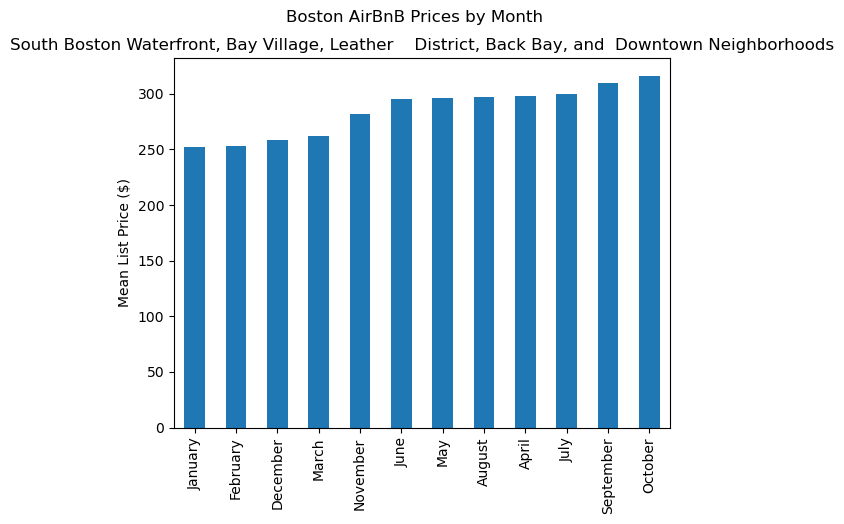

In [308]:
# Let's plot out the average price by month
bh_month = bh_cal.groupby(
    bh_cal['month'])['price_y'].mean().sort_values()
bh_month.plot(kind='bar')

plt.suptitle('Boston AirBnB Prices by Month')
plt.title('South Boston Waterfront, Bay Village, Leather\
    District, Back Bay, and  Downtown Neighborhoods')
plt.xlabel('')
plt.ylabel('Mean List Price ($)')

It looks like early fall is definitely a good time of year for guests, while the cold Boston winters are impacting prices once the temperature starts dropping in November/December. Spring/Summer looks pretty consistent - I'll probably want to set my base price for those months, and adjust from there. Let's check out the granularity in  a table just in case though.

In [310]:
# convert series to dataframe for easy table identifying
# average prices and count so there's some context to the numbers
bh_month_prices = bh_month.to_frame()
# pull the count of listings in each neighborhood,
# so I'm not looking at a small sample
month_cnt = bh_cal['month'].value_counts()
# merge two dataframes to view in one table
month_df = pd.merge(bh_month_prices, month_cnt, how='left', on='month')
# format list prices for visual currency, rename columns
month_df = month_df.rename(columns={'price_y':'Avg List Price', 'count':'# of Listings'})
month_df.index.name = 'Month'
month_df = month_df.style.format({'Avg List Price':"${:,.2f}"})

month_df

,Avg List Price,# of Listings
Month,,
January,$252.54,17205
February,$252.66,15540
December,$258.39,17453
March,$261.68,17205
November,$281.70,16920
June,$295.13,16650
May,$296.27,17112
August,$297.31,17267
April,$298.09,16650


I'll definitely want to set my initial prices for spring and summer months, with discounts for winter, and upcharges for early fall. Once I secure a property and set it up to start booking guests, I'll come back to look at how to adjust my prices for certain days of the week and holidays.